In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df=pd.read_csv(r'C:\Users\aksha\Downloads\Customer-Churn-analysis-main\Customer-Churn-analysis-main\Customer Churn.csv',encoding='unicode_escape')

In [60]:
df.shape


(7043, 21)

In [61]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Here we are replacing the blanks in TotalCharges with 0 as tenure is 0 and no total charges are recorded


In [63]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [64]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [65]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [66]:
df["customerID"].duplicated().sum()

0

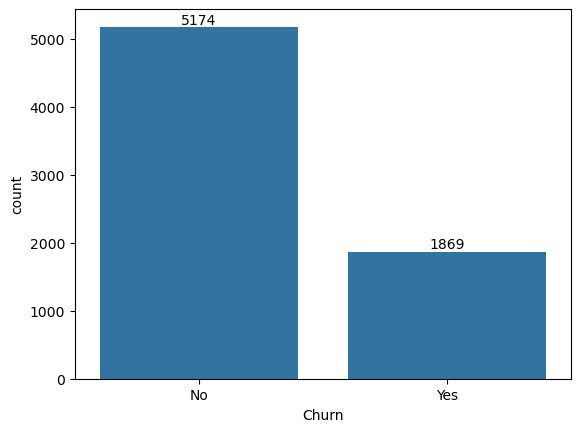

In [67]:
ax=sns.countplot(x='Churn',data=df)
for bars in ax.containers:
    ax.bar_label(bars)


Text(0.5, 1.0, 'Total Customers percentage per Churn Category')

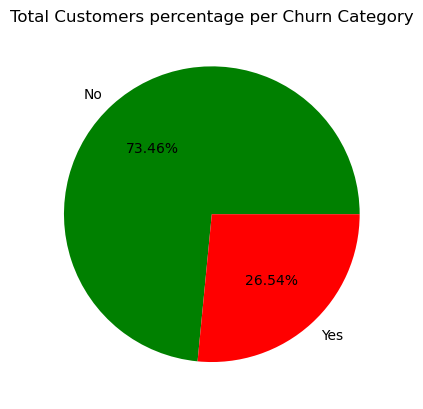

In [68]:
gb=df.groupby("Churn").agg({'Churn':"count"})
gb
colors=['green','red']
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%",colors=colors)
plt.title("Total Customers percentage per Churn Category")

 #The churn rate among our customers is 26.54%

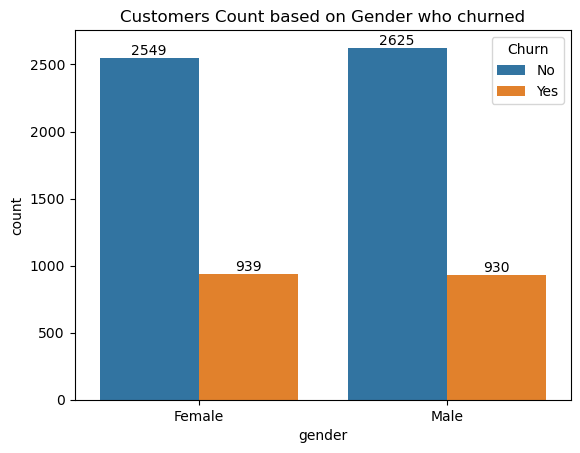

In [76]:
ax=sns.countplot(x='gender',data=df,hue="Churn")
plt.title("Customers Count based on Gender who churned")
for bars in ax.containers:
    ax.bar_label(bars)

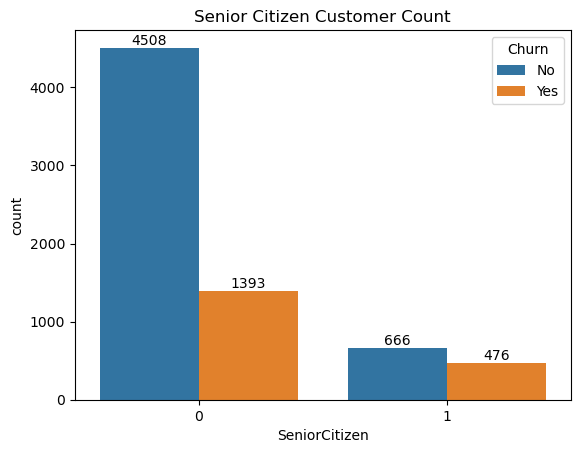

In [77]:
ax=sns.countplot(x='SeniorCitizen',hue='Churn',data=df)
plt.title("Senior Citizen Customer Count")
for bars in ax.containers:
    ax.bar_label(bars)


#We can observe most of the senior citizens have churned out

<Axes: xlabel='tenure', ylabel='Count'>

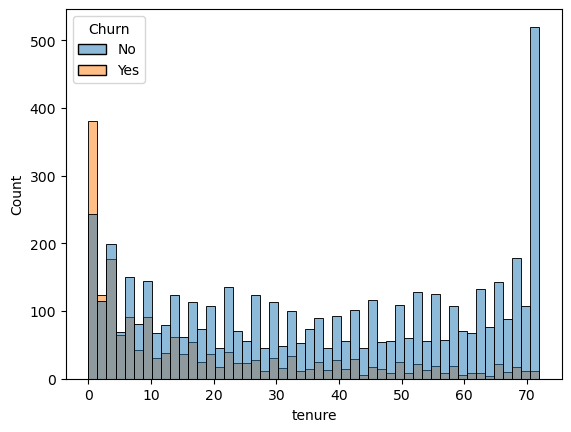

In [83]:
sns.histplot(data=df,x='tenure',bins=50,hue='Churn')

#people who have used our services for less number of months have churned

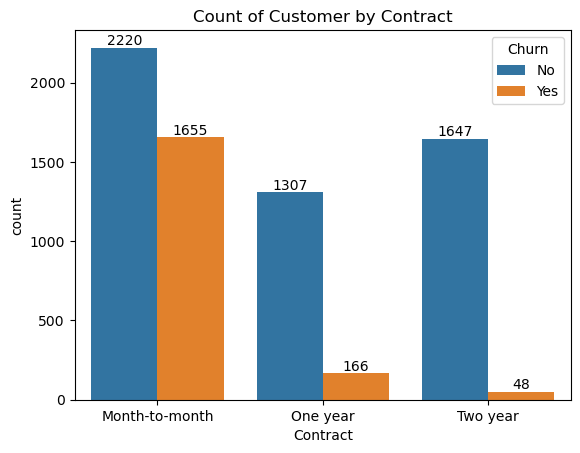

In [85]:
ax=sns.countplot(x='Contract',hue='Churn',data=df)
plt.title("Count of Customer by Contract")
for bars in ax.containers:
    ax.bar_label(bars)


#From this we  can conclude that people who have month-to-month contract have churned out more when compared to one year or two year contract

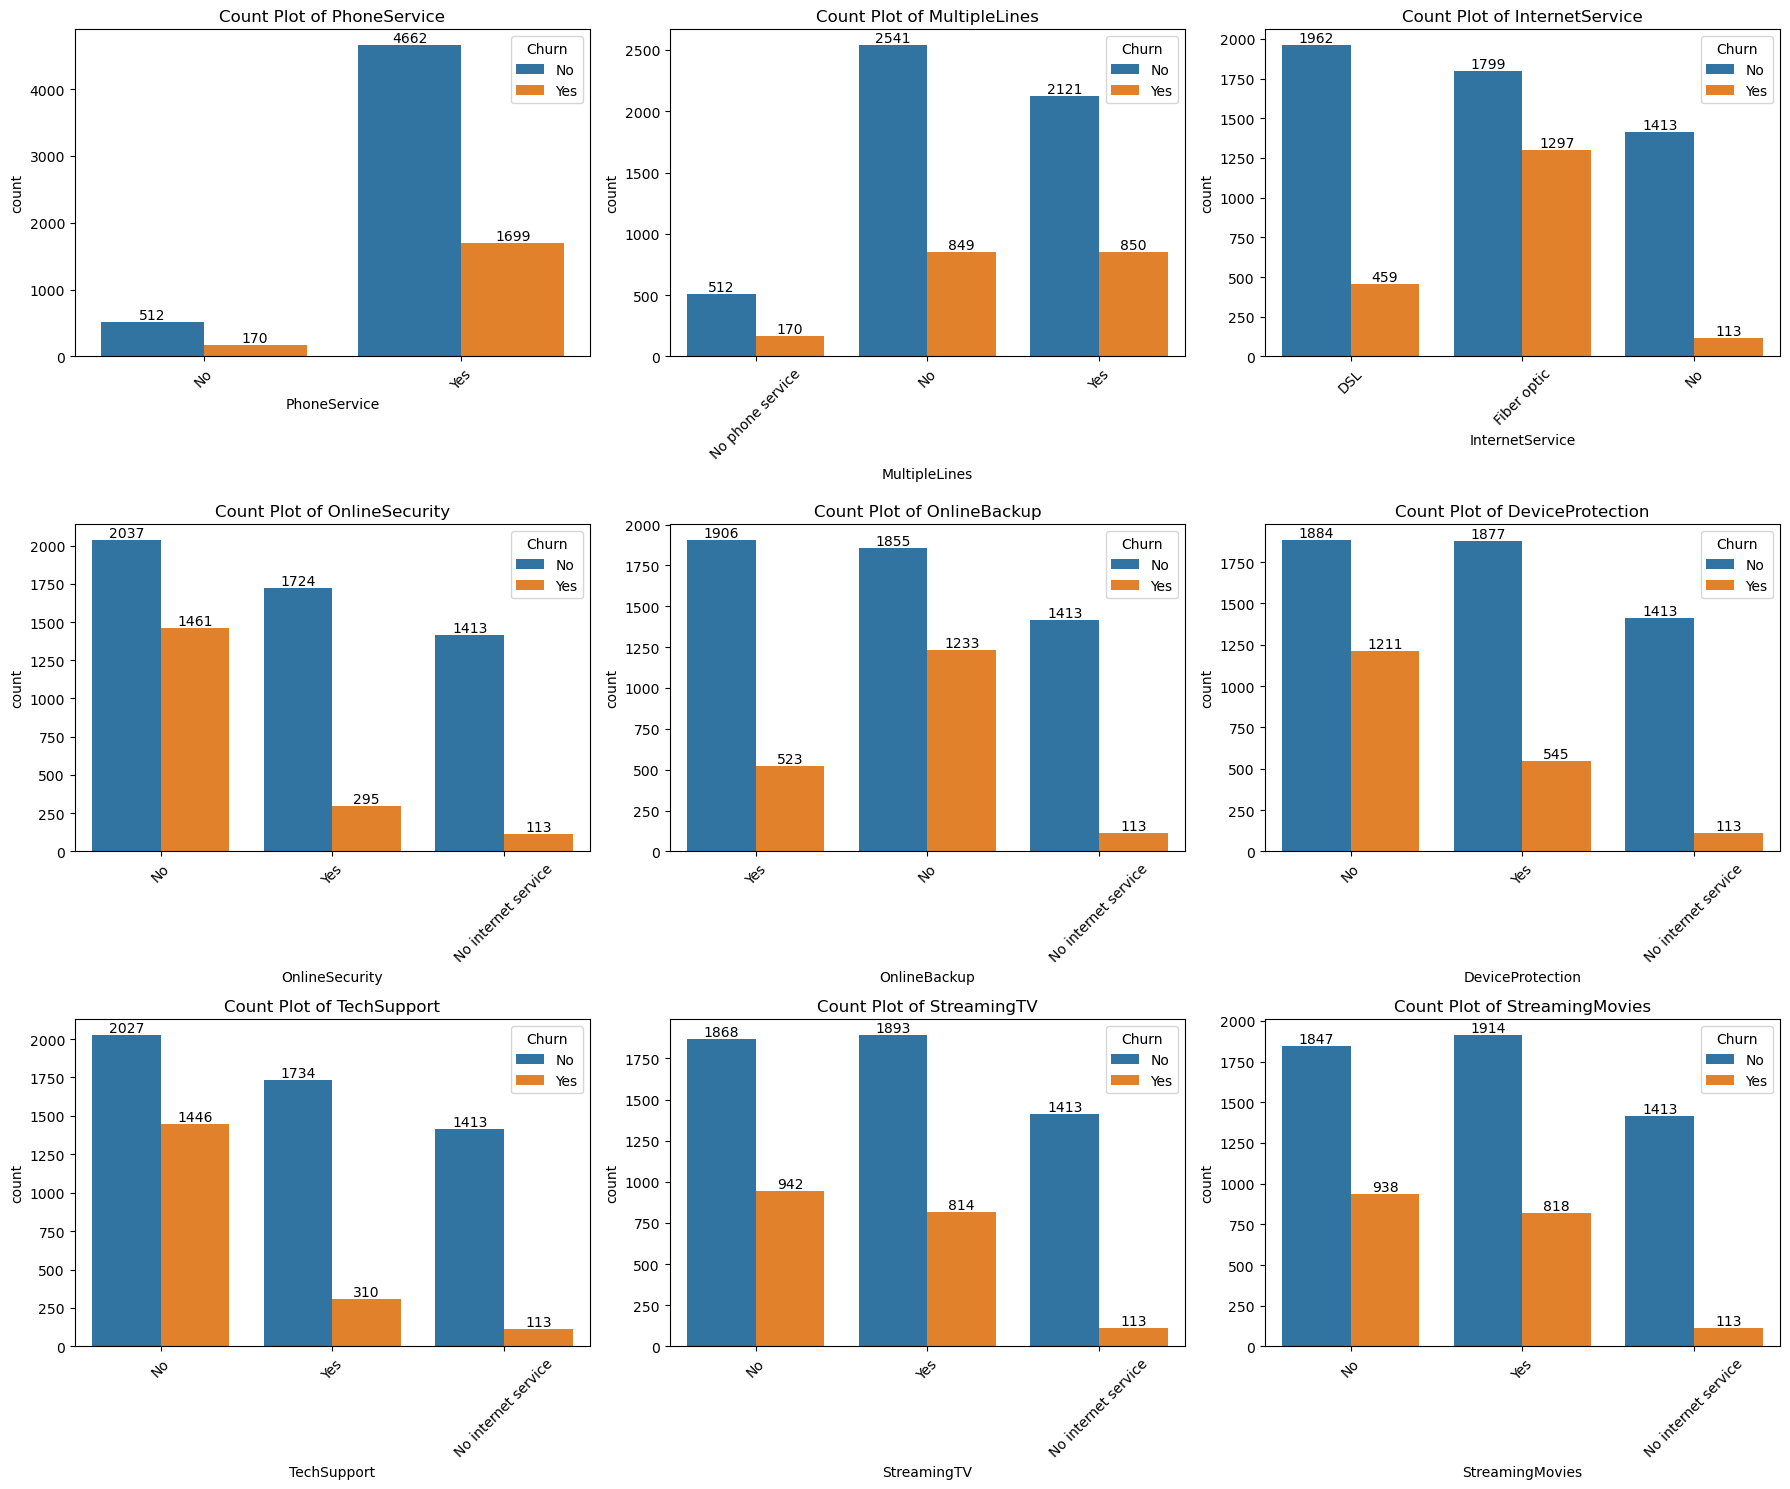

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to plot
features = [
    "PhoneService", "MultipleLines", "InternetService",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

plt.figure(figsize=(18, 15))  # One figure for all 9 plots

for i in range(len(features)):
    plt.subplot(3, 3, i + 1)  # 3 rows x 3 columns grid
    plt.title(f"Count Plot of {features[i]}")
    ax = sns.countplot(data=df, x=features[i], hue="Churn")
    plt.xticks(rotation=45)
    
    # Optional: Add bar labels
    for bars in ax.containers:
        ax.bar_label(bars)

plt.tight_layout()
plt.show()


#The plots reveal that customers who lack certain services—such as tech support, online backup, or security—are more likely to churn, while those actively using essential services like PhoneService and DSL Internet tend to stay. This indicates that service availability and engagement significantly impact customer retention.


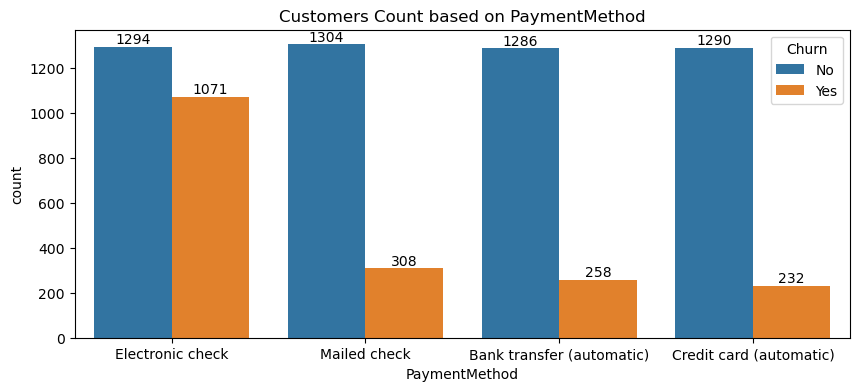

In [112]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x='PaymentMethod',data=df,hue="Churn")
plt.title("Customers Count based on PaymentMethod")
for bars in ax.containers:
    ax.bar_label(bars)

#Customers are likely to churn when he is using Electronic check as paymentmethod

#Overall, Customers who feel supported, use more services, and commit to longer contracts are much less likely to leave.
